# 00 - EDA

In [1]:
import pandas as pd
df=pd.read_csv('D:\\bl\\insight-test.csv')

In [2]:
def df_summarier(df):
    a = df.isna().any(axis=0)
    b = df.dtypes
    c = df.nunique()
    d = pd.Series({col: df[col].unique() for col in df})
    return pd.concat([a, b, c,d], axis=1).rename(
        columns={0: "has nan?", 1: "dtypes", 2: "num of unique values", 3: "list of unique values"}
    )


In [3]:
df_summarier(df)

,has nan?,dtypes,num of unique values,list of unique values
user_id,False,int64,69306,"[281605921, 125302602, 125327377, 125601271, 1..."
is_new,False,int64,2,"[1, 0]"
time,False,object,229835,"[2015-06-12 03:41:44.263000+00:00, 2015-06-15 ..."
voucher_type,True,float64,2,"[nan, 1.0, 0.0]"
voucher_valid,True,float64,2,"[nan, 1.0, 0.0]"
basket_amount,False,float64,125094,"[2.8772007552981635e-05, 2.351516046569688e-05..."
voucher_max_amount,False,float64,26,"[0.0, 0.0002, 0.0004, 0.001, 2e-05, 4e-05, 0.0..."
voucher_percentage,False,float64,20,"[0.0, 1.0, 2.0, 1.5, 10.0, 20.0, 99.0, 50.0, 1..."
voucher_min_purchase,False,float64,16,"[0.0, 0.01, 0.02, 0.006, 0.002, 0.004, 0.001, ..."
voucher_amount,False,float64,7451,"[0.0, 0.0198636151779623, 0.0193235168800721, ..."


In [4]:
# df.fillna(df.min(), inplace=True)
df['voucher_type'] = df['voucher_type'].astype('Int64').astype(str)
df['voucher_valid'] = df['voucher_valid'].astype('Int64').astype(str)
df.fillna('unknown', inplace=True)


In [5]:
df.groupby('user_group').user_id.count()

user_group
0     82603
1    147244
Name: user_id, dtype: int64

In [6]:
# df_summarier(df)

In [7]:
df.groupby(['is_remitted','is_paid','purchase','trx_is_voucher', 'voucher_valid','voucher_type'], dropna=False)[['voucher_valid']].count()

voucher_valid
is_remitted is_paid purchase trx_is_voucher voucher_valid voucher_type               
0           0       0        0              0             <NA>                    301
                                            1             0                       135
                                                          1                       485
                                            <NA>          <NA>                   6459
                    1        0              0             <NA>                    402
                                            1             0                       150
                                                          1                       236
                                            <NA>          <NA>                    641
                             1              1             0                         1
                                                          1                         3
            1       1        0              0             <NA>                    123
                                            1             0                         8
                                                          1                       122
                                            <NA>          <NA>                   5937
                             1              1             0                       102
                                                          1                       536
                                            <NA>          <NA>                      1
1           0       1        0              <NA>          <NA>                      1
            1       1        0              0             <NA>                   2161
                                            1             0                        71
                                                          1                      1688
                                            <NA>          <NA>                 174670
                             1              0             <NA>                     36
                                            1             0                      6522
                                                          1                     28899
                                            <NA>          <NA>                    157

In [8]:
df.query('is_paid==0 & is_remitted==1')

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
101021,140386015,1,2015-06-14 10:25:21.006000+00:00,<NA>,<NA>,4.219543e-08,0.0,0.0,0.0,0.0,...,2013-09-04 06:17:17+00:00,1,0.10846,0.003916,0.013514,0.129032,0.000078,0.0,0.033244,0.155625


In [9]:
df.drop(101021,inplace=True)

In [10]:
pd.crosstab(df.is_paid, df.purchase)

purchase,0,1
is_paid,,
0,7380,1433
1,0,221033


In [11]:
pd.crosstab(df.is_paid, df.is_remitted)

is_remitted,0,1
is_paid,,
0,8813,0
1,6829,214204


In [12]:
def plot_per(some):
  gdf1= df[[some, 'purchase']].groupby([some, 'purchase']).purchase.count() / df[[some, 'purchase']].groupby([some]).purchase.count()
  gdf2=gdf1.unstack()
  gdf3=gdf2[gdf2.columns[::-1] ]
  return gdf3.plot.bar(stacked=True)

<AxesSubplot:xlabel='province'>

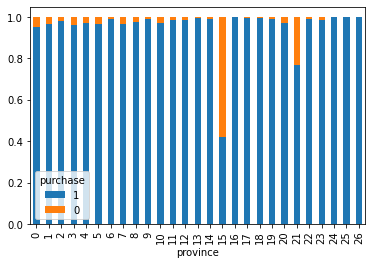

In [13]:
plot_per('province')

<AxesSubplot:xlabel='user_type'>

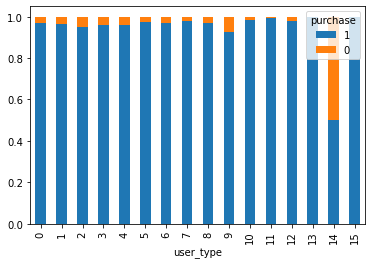

In [14]:
plot_per('user_type')

<AxesSubplot:xlabel='user_group'>

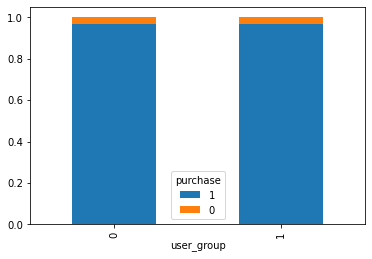

In [18]:
plot_per('user_group')

<AxesSubplot:xlabel='account_type'>

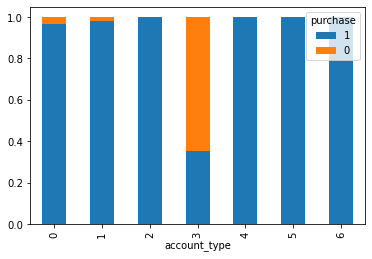

In [19]:
plot_per('account_type')

<AxesSubplot:xlabel='user_purchased_prior'>

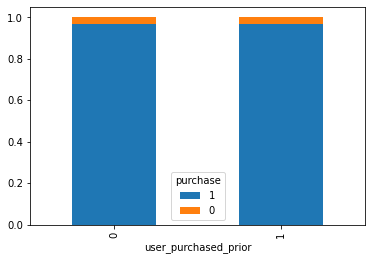

In [20]:
plot_per('user_purchased_prior')

<AxesSubplot:xlabel='marketing_tier'>

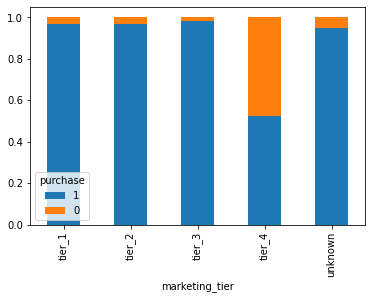

In [21]:
plot_per('marketing_tier')

<AxesSubplot:xlabel='voucher_type'>

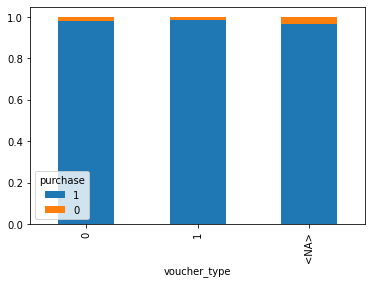

In [22]:
plot_per('voucher_type')

<AxesSubplot:xlabel='voucher_valid'>

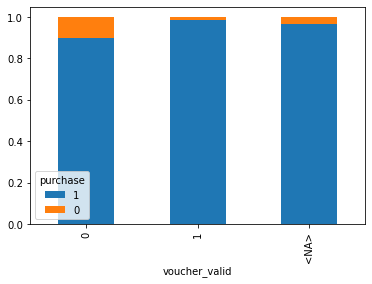

In [23]:
plot_per('voucher_valid')

<AxesSubplot:xlabel='referrer_type'>

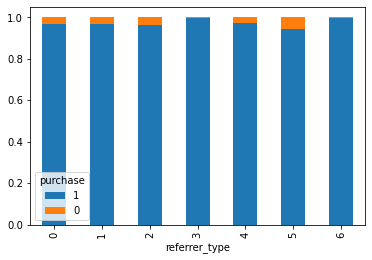

In [24]:
plot_per('referrer_type')

<AxesSubplot:xlabel='user_register_from'>

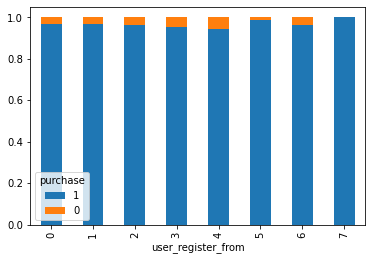

In [25]:
plot_per('user_register_from')

<AxesSubplot:xlabel='trx_is_voucher'>

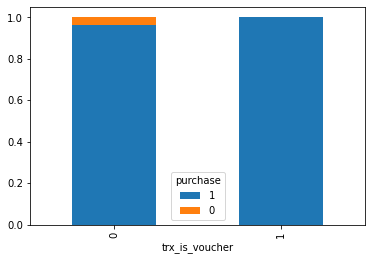

In [26]:
plot_per('trx_is_voucher')

# 02 - How much impact in basket amount would removing vouchers have?


# Impact of vouchers

In [15]:
cpurchased = df[df.purchase==1][['basket_amount','trx_is_voucher','user_id','purchase']]

cvoucher = cpurchased[cpurchased.trx_is_voucher==1].groupby('user_id').purchase.sum()
call = cpurchased.groupby('user_id').purchase.sum()

In [20]:
cpurchased.head()

,basket_amount,trx_is_voucher,user_id,purchase,voucher_rate
1,0.000024,0,281605921,1,0.000000
2,0.000164,0,125302602,1,0.166667
3,0.000175,1,125302602,1,0.166667
4,0.000170,1,125302602,1,0.166667
5,0.000173,0,125302602,1,0.166667


In [21]:
cvoucher.head()

user_id
4148      1
62283     3
71122     1
78926     1
115563    1
Name: purchase, dtype: int64

In [22]:
call.head()

user_id
110      1
4148     1
27610    1
50037    1
62283    9
Name: purchase, dtype: int64

In [16]:
voucher_rate=(cvoucher/call).fillna(0).rename('voucher_rate')

In [17]:
cpurchased=cpurchased.join(voucher_rate.rename('voucher_rate'), on='user_id')

In [23]:
cpurchased.head()

,basket_amount,trx_is_voucher,user_id,purchase,voucher_rate
1,0.000024,0,281605921,1,0.000000
2,0.000164,0,125302602,1,0.166667
3,0.000175,1,125302602,1,0.166667
4,0.000170,1,125302602,1,0.166667
5,0.000173,0,125302602,1,0.166667


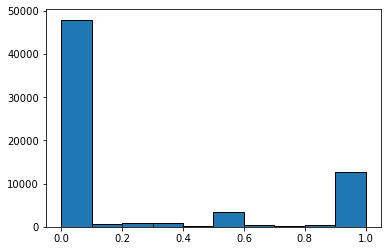

In [18]:
import matplotlib.pyplot as plt

num,bin,_=plt.hist(voucher_rate, bins=10, edgecolor="k")

In [303]:
cpurchased['bin']=pd.cut(cpurchased.voucher_rate,10)

# Impact on basket value

In [304]:
dfb=cpurchased.groupby('bin').basket_amount.mean()
dfb

bin
(-0.001, 0.1]    0.000067
(0.1, 0.2]       0.000092
(0.2, 0.3]       0.000105
(0.3, 0.4]       0.000118
(0.4, 0.5]       0.000085
(0.5, 0.6]       0.000174
(0.6, 0.7]       0.000277
(0.7, 0.8]       0.000280
(0.8, 0.9]       0.000217
(0.9, 1.0]       0.000095
Name: basket_amount, dtype: float64

In [305]:
dfbnv=cpurchased[cpurchased.trx_is_voucher==0].groupby('bin').basket_amount.mean()
dfbnv

bin
(-0.001, 0.1]    0.000067
(0.1, 0.2]       0.000089
(0.2, 0.3]       0.000094
(0.3, 0.4]       0.000082
(0.4, 0.5]       0.000065
(0.5, 0.6]       0.000112
(0.6, 0.7]       0.000106
(0.7, 0.8]       0.000135
(0.8, 0.9]       0.000105
(0.9, 1.0]       0.000057
Name: basket_amount, dtype: float64

In [321]:
dfbdiff = pd.DataFrame()
dfbdiff['withvoucher'] = dfb
dfbdiff['nonvoucher'] = dfbnv
dfbdiff['difference'] = dfb-dfbnv
dfbdiff['%'] = (dfbdiff['difference']/dfb*100)
dfbdiff

,withvoucher,nonvoucher,difference,%
bin,,,,
"(-0.001, 0.1]",0.000067,0.000067,3.326690e-08,0.050000
"(0.1, 0.2]",0.000092,0.000089,2.175286e-06,2.373295
"(0.2, 0.3]",0.000105,0.000094,1.102453e-05,10.487412
"(0.3, 0.4]",0.000118,0.000082,3.609190e-05,30.636798
"(0.4, 0.5]",0.000085,0.000065,1.999175e-05,23.623417
"(0.5, 0.6]",0.000174,0.000112,6.216741e-05,35.701060
"(0.6, 0.7]",0.000277,0.000106,1.710720e-04,61.834185
"(0.7, 0.8]",0.000280,0.000135,1.450545e-04,51.742123
"(0.8, 0.9]",0.000217,0.000105,1.121365e-04,51.608604


# Impact on unique users

In [315]:
dfu=cpurchased.groupby('bin').user_id.nunique()
dfu

bin
(-0.001, 0.1]    48053
(0.1, 0.2]         786
(0.2, 0.3]         621
(0.3, 0.4]        1051
(0.4, 0.5]        3423
(0.5, 0.6]         165
(0.6, 0.7]         495
(0.7, 0.8]         395
(0.8, 0.9]         310
(0.9, 1.0]       12618
Name: user_id, dtype: int64

In [316]:
dfunv=cpurchased[cpurchased.trx_is_voucher==0].groupby('bin').user_id.nunique()
dfunv

bin
(-0.001, 0.1]    48053
(0.1, 0.2]         786
(0.2, 0.3]         621
(0.3, 0.4]        1051
(0.4, 0.5]        3423
(0.5, 0.6]         165
(0.6, 0.7]         495
(0.7, 0.8]         395
(0.8, 0.9]         310
(0.9, 1.0]         122
Name: user_id, dtype: int64

In [320]:
dfudiff = pd.DataFrame()
dfudiff['withvoucher'] = dfu
dfudiff['nonvoucher'] = dfunv
dfudiff['difference'] = dfu-dfunv
dfudiff['%'] = (dfudiff['difference']/dfu*100)
dfudiff

,withvoucher,nonvoucher,difference,%
bin,,,,
"(-0.001, 0.1]",48053,48053,0,0.000000
"(0.1, 0.2]",786,786,0,0.000000
"(0.2, 0.3]",621,621,0,0.000000
"(0.3, 0.4]",1051,1051,0,0.000000
"(0.4, 0.5]",3423,3423,0,0.000000
"(0.5, 0.6]",165,165,0,0.000000
"(0.6, 0.7]",495,495,0,0.000000
"(0.7, 0.8]",395,395,0,0.000000
"(0.8, 0.9]",310,310,0,0.000000
